<a href="https://colab.research.google.com/github/linlih/CS-Notes/blob/master/code/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM From scratch

参考自：sentdex
https://www.youtube.com/watch?v=yrnhziJk-z8&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=28

In [0]:
import torch

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [0]:
class Support_Vector_Machine:
  
  def __init__(self, visualization=True):
    """
    初始化设置一些参数
    显示以及颜色信息
    """
    self.visualization = visualization
    self.colors = {1:'r', -1:'b'}
    if self.visualization:
      self.fig = plt.figure()
      self.ax = self.fig.add_subplot(1,1,1)

  def fit(self, data):
    """
    SVM的实现
    """
    self.data = data
    # { ||w||: [w, b]}
    # 存放最优的参数
    opt_dict = {}
    
    transforms = [[1, 1],
            [-1, 1],
            [-1, -1],
            [1, -1]]
    
    all_data = []
    # 将所有的数据展成一维的
    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)
    
    # 得到数据中最大的值和最小的值
    self.max_feature_value = max(all_data)
    self.min_feature_value = min(all_data)
    all_data = None # 释放掉all_data的内存

    # support vectors yi(xi.w+b) = 1

    step_sizes = [self.max_feature_value * 0.1,
            self.max_feature_value * 0.01,
            # point of expense
            self.max_feature_value * 0.001,]
    
    # extremely expesnsive
    b_range_multiple = 5
    # we dont need to take as mall of steps with b as we do w
    b_mutiple = 5

    latest_optimum = self.max_feature_value * 10

    for step in step_sizes:
      # 初始化w的值
      w = np.array([latest_optimum, latest_optimum])
      
      # we can do this because convex
      optimized = False
      while not optimized:
        # b的取值从 -max*range, max*range, 每次移动为 step * b_mutiple
        for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                   self.max_feature_value * b_range_multiple, 
                   step*b_mutiple):
          # 4种不同的transform方式
          for transformation in transforms:
            w_t = w * transformation
            found_option = True
            # weakest link in SVM fundamentally
            # SMO attempts to fix this a bit
            # yi(xi.w+b) >= 1
            # 遍历所有的数据
            for i in self.data:
              for xi in self.data[i]:
                yi=i
                if not yi*(np.dot(w_t, xi) + b) >= 1:
                  found_option = False

            if found_option:
              opt_dict[np.linalg.norm(w_t)] = [w_t, b]
        if w[0] < 0:
          optimized = True
          print('Optimized a step.')
        else:
          # w = [5, 5]
          # step = 1
          # w - step = [4, 4]
          w = w - step
      
      norms = sorted([n for n in opt_dict])
      # ||w||: [w, b]
      opt_choice = opt_dict[norms[0]]
      self.w = opt_choice[0]
      self.b = opt_choice[1]
      latest_optimum = opt_choice[0][0]+step*2
    # 打印最终的结果
    for i in self.data:
      for xi in self.data[i]:
        yi = i
        print(xi, ':', yi*(np.dot(self.w, xi)+self.b))

  
  def predict(self, features):
    # sign( x.w+b )
    classification = np.sign(np.dot(np.array(features), self.w)+self.b)
    if classification != 0 and self.visualization:
      self.ax.scatter(features[0], features[1], s=20, marker='x', c=self.colors[classification])
    return classification
  
  def visualize(self):
    [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    # hyperplane = x.w+b
    # v = x.w+b
    # psv = 1 positive support vector
    # nsv = 1
    # dec = 0
    def hyperplane(x, w, b, v):
      return (-w[0]*x-b+v) / w[1]
    datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # (w*x+b) = 1
    # positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
    psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
    self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    npsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
    npsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
    self.ax.plot([hyp_x_min, hyp_x_max], [npsv1, npsv2], 'k')

    db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
    db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
    self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
  
    plt.show()



In [0]:
data_dict = {-1:np.array([[1, 7],
              [2, 8],
              [3, 8]]),
        1:np.array([[5, 1],
             [6, -1],
             [7, 3],])}

In [0]:
#all_data = []
for yi in data_dict:
  for featureset in data_dict[yi]:
    for feature in featureset:
      #all_data.append(feature)
      print(feature)

1
7
2
8
3
8
5
1
6
-1
7
3


Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


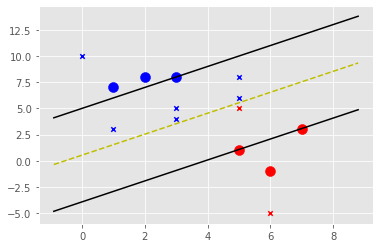

In [0]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0, 10],
        [1, 3],
        [3, 4],
        [3, 5],
        [5, 5],
        [5, 6],
        [6, -5],
        [5, 8],]
for p in predict_us:
  svm.predict(p)
svm.visualize()

# SMO算法

ref: 《机器学习实战》

In [0]:
def load_data(filename):
  dataMat, labelMat = [], []
  fr = open(filename)
  for line in fr.readlines():
    lineArr = line.strip().split('\t')
    dataMat.append([float(lineArr[0]), float(lineArr[1])])
    labelMat.append(float(lineArr[2]))
  fr.close()
  return dataMat, labelMat

def clip(alpha, L, H):
  if alpha < L:
    return L
  elif alpha > H:
    return H
  else: 
    return alpha

def selectJrand(i, m):
  j = i
  while(j == i):
    j = int(random.uniform(0, m))
  return j

def clipAlpha(aj, H, L):
  if aj < L:
    aj = L
  elif aj > H:
    aj = H
  return aj

In [0]:
from numpy import *
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
  dataMatrix = mat(dataMatIn)
  labelMat = mat(classLabels).transpose()
  b = 0
  m, b = shape(dataMatrix)
  alphas = mat(zeros((m, 1)))
  iter = 0
  while (iter < maxIter):
    alphaPairsChanged = 0
    for i in range(m):
      fXi = float(multiply(alphas, labelMat).T * \
             (dataMatrix * dataMatrix[i, :].T)) + b
      Ei = fXi - float(labelMat[i])
      if ((labelMat[i] * Ei < -toler) and (alphas[i] < C)) or \
         ((labelMat[i] * Ei > toler) and \
          (alphas[i] > 0)):
        j = selectJrand(i, m) # 随机选择第二个alpha
        fXj = float(multiply(alphas, labelMat).T * \
               (dataMatrix*dataMatrix[j,:].T)) + b
        Ej = fXj - float(labelMat[j])
        alphaIold = alphas[i].copy()
        alphaJold = alphas[j].copy()
        if (labelMat[i] != labelMat[j]):
          L = max(0, alphas[j] - alphas[i])
          H = min(C, C + alphas[j] - alphas[i])
        else :
          L = max(0, alphas[j] + alphas[i] - C)
          H = min(C, alphas[j] + alphas[i])
        if L==H: print("L==H"); continue
        eta = 2.0 * dataMatrix[i,:] * dataMatrix[j,:].T - \
            dataMatrix[i,:] * dataMatrix[i,:].T -\
            dataMatrix[j,:] * dataMatrix[j,:].T
        if eta >= 0 : print("eta>=0"); continue
        alphas[j] -= labelMat[j] * (Ei - Ej)/eta
        alphas[j] = clipAlpha(alphas[j], H, L)
        if (abs(alphas[j] - alphaJold) < 0.00001):
          print("j not moving enough"); continue
        alphas[i] += labelMat[j] * labelMat[i] * \
               (alphaJold - alphas[j])
        b1 = b - Ei - labelMat[i] * (alphas[i] - alphaIold) * \
           dataMatrix[i,:]* dataMatrix[i,:].T - \
           labelMat[j]*(alphas[j] - alphaJold) * \
           dataMatrix[i,:]*dataMatrix[j,:].T
        b2 = b - Ej - labelMat[i] * (alphas[i] - alphaIold) * \
           dataMatrix[i,:]* dataMatrix[j,:].T - \
           labelMat[j]*(alphas[j] - alphaJold) * \
           dataMatrix[j,:]*dataMatrix[j,:].T
        if (0 < alphas[i]) and (C > alphas[i]):
          b = b1
        elif (0 < alphas[j]) and (C > alphas[j]):
          b = b2
        else:
          b = (b1 + b2) / 2.0
        alphaPairsChanged += 1
        print("iter: %d i:%d, pairs changed %d" % \
              (iter, i, alphaPairsChanged))
    if (alphaPairsChanged == 0): iter += 1
    else: iter = 0
    print("interation number: %d" % iter)
  return b, alphas

In [4]:
"!wget https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch06/testSet.txt

--2020-03-16 13:18:44--  https://raw.githubusercontent.com/pbharrin/machinelearninginaction3x/master/Ch06/testSet.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2108 (2.1K) [text/plain]
Saving to: ‘testSet.txt’

testSet.txt         100%[===================>]   2.06K  --.-KB/s    in 0s      

2020-03-16 13:18:49 (66.2 MB/s) - ‘testSet.txt’ saved [2108/2108]



In [0]:
dataMat, labelMat = load_data('testSet.txt')

In [15]:
b, alpas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)

L==H
iter: 0 i:1, pairs changed 1
L==H
L==H
iter: 0 i:5, pairs changed 2
L==H
iter: 0 i:10, pairs changed 3
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
interation number: 0
iter: 0 i:0, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:10, pairs changed 2
j not moving enough
L==H
L==H
iter: 0 i:24, pairs changed 3
j not moving enough
j not moving enough
iter: 0 i:54, pairs changed 4
j not moving enough
iter: 0 i:62, pairs changed 5
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
interation number: 0
iter: 0 i:0, pairs changed 1
iter: 0 i:1, pairs changed 2
iter: 0 i:5, pairs changed 3
j not moving enough
iter: 0 i:10, pairs changed 4
j not moving enough
L==H
j not moving enough
iter: 0 i:24, pairs changed 5
L==H
iter: 0 i:30, pairs changed 6
iter: 0 i:46, pairs chan

In [0]:
alphas = np.array(alpas.ravel())[0]
alphas

In [47]:
b = np.array(b.ravel())[0]
b

array([-3.83300066])

In [0]:
def get_w(alphas, dataset, labels):
  ''' 通过已知数据点和拉格朗日乘子获得分割超平面参数w
  '''
  alphas, dataset, labels = np.array(alphas), np.array(dataset), np.array(labels)
  yx = labels.reshape(1, -1).T*np.array([1, 1])*dataset
  w = np.dot(yx.T, alphas)
  return w.tolist()

<class 'float'>
0.8131488914872567
<class 'float'>
9.854303
9.854303
[15.71619496]
[9.854303, -0.743036]


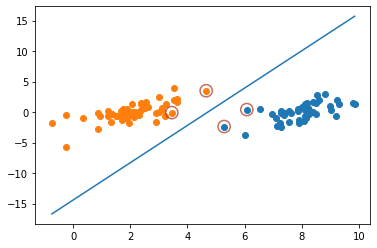

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# 分类数据点
classified_pts = {'+1': [], '-1': []}
for point, label in zip(dataMat, labelMat):
    if label == 1.0:
        classified_pts['+1'].append(point)
    else:
        classified_pts['-1'].append(point)
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制数据点
for label, pts in classified_pts.items():
    pts = np.array(pts)
    ax.scatter(pts[:, 0], pts[:, 1], label=label)
# 绘制分割线
w = get_w(alphas, dataMat, labelMat)
x1, _ = max(dataMat, key=lambda x: x[0])
x2, _ = min(dataMat, key=lambda x: x[0])
a1, a2 = w
print(type(a1))
print(a1)
print(type(x1))
print(x1)
y1, y2 = (-b - a1*x1)/a2, (-b - a1*x2)/a2
print(x1)
print(y1)
print([x1, x2])
ax.plot(np.array([x1, x2]), np.array([y1, y2]))
# 绘制支持向量
for i, alpha in enumerate(alphas):
  if abs(alpha) > 1e-3:
    x, y = dataMat[i]
    ax.scatter([x], [y], s=150, c='none', alpha=0.7,
                linewidth=1.5, edgecolor='#AB3319')
plt.show()